# `157-Project` Testing 11/14 Downloaded Data

This doc draws on data use techniques from Section 3 to play with the downloaded data: this doc can be used as a blueprint for working with the US COVID case data for the rest of this project

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Loading And Displaying Data Table

In [3]:
# load the csv
csv_path = 'time_series_covid19_confirmed_US.csv'
csv = pd.read_csv(csv_path)
#check the data
csv

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2212,2230,2242,2267,2283,2304,2328,2351,2385,2417
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7061,7097,7134,7188,7226,7263,7348,7409,7454,7523
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1079,1080,1090,1092,1095,1098,1107,1112,1113,1117
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,897,907,917,924,926,932,948,961,966,973
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2188,2222,2253,2286,2297,2335,2378,2400,2429,2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,873,897,922,932,977,1007,1022,1025,1066,1108
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,518,529,542,544,551,568,614,627,664,686
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,175,179,188,185,187,190,197,199,203,206


#### From Section 3: Consideration in cleaning and organizing the data for use:

We can see that the data have lots of columns that we probably don't need for our simple analysis. In fact, we see that the first `11` columns have extraneous information. Let's extract the data only for a specific state, and calculate the number of daily cases.

We see that the data is actually split into the numbers reported by each county. When trying to find the total number of daily cases, we have to aggregate the reported numbers by all the counties.

Another thing we need to consider is that each day actually reports the _total_ number of cases thus far. So, again, we have to acount for that in order to find the number of daily cases.

### Example of Extracting the New Cases per Day for Mass

In [4]:
# extract the list of columns
columns = list(csv.columns)
# daily data are after column 11
days = columns[11:]
SOI = ['Massachusetts', 'Illinois', 'New York', 'Texas', 'California', 'Florida']

In [5]:
def get_state_arr(state, days):
    # restrict to your state's data
    csv_state = csv[csv['Province_State'] == state]
    # find the new daily cases
    daily_new_cases = []
    prev_sum = 0
    for day in days:
        counties_sum = 0
        for county in csv_state[day]:
            counties_sum += county
        
        daily_new_cases.append(counties_sum - prev_sum)
        prev_sum = counties_sum
        state_arr = np.asarray(daily_new_cases)
    return state_arr

In [6]:
MA = get_state_arr(SOI[0], days)
IL = get_state_arr(SOI[1], days)
NY = get_state_arr(SOI[2], days)
TX = get_state_arr(SOI[3], days)
CA = get_state_arr(SOI[4], days)
FL = get_state_arr(SOI[5], days)

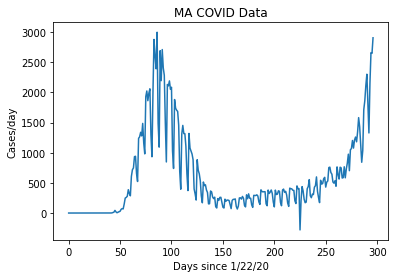

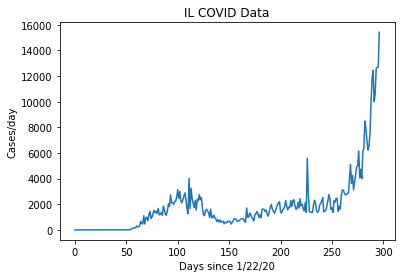

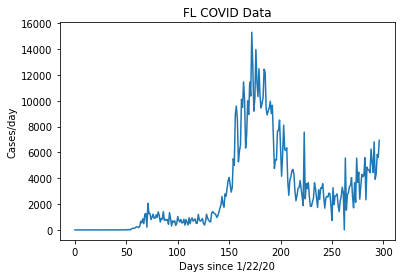

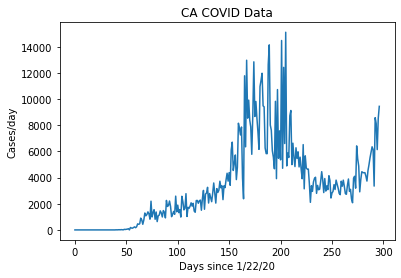

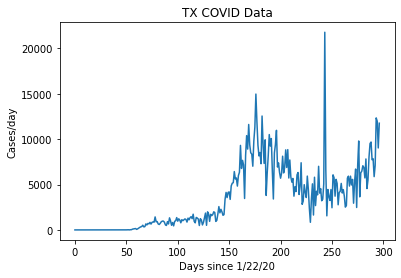

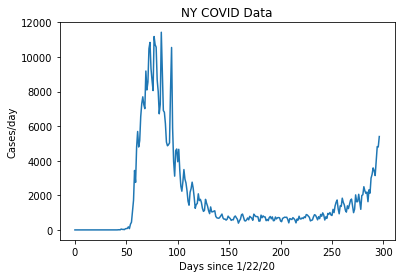

In [7]:
plt.figure(1)
plt.plot(MA)
plt.title('MA COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(2)
plt.plot(IL)
plt.title('IL COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(3)
plt.plot(FL)
plt.title('FL COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(4)
plt.plot(CA)
plt.title('CA COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(5)
plt.plot(TX)
plt.title('TX COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(6)
plt.plot(NY)
plt.title('NY COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.show()

## Idea 1: stack 6 states

In [10]:
states_stacked = np.array([MA,IL, NY, TX, FL, NY])

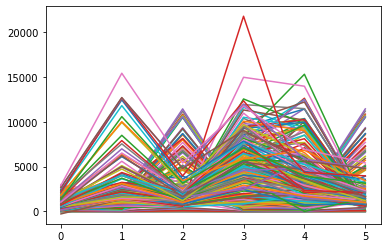

In [88]:
plt.plot(states_stacked)
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


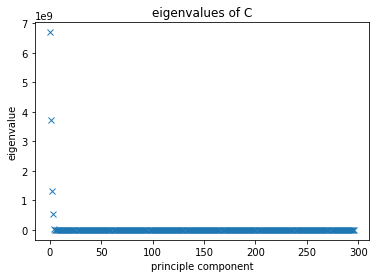

In [29]:
mu = 
ss_mr  = (states_stacked.T - np.mean(states_stacked, axis = 1).T).T
C = ss_mr.T@ss_mr
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

In [28]:
len(IL)

297

In [77]:
W_main = U[0:1,:]
Y = W_main@ss_mr.T
ss_rec1 = ((W_main.T@(Y)).T + np.mean(ss_mr, 0).T).T
W_main = U[0:2,:]
Y = W_main@ss_mr.T
ss_rec2 = ((W_main.T@(Y)).T + np.mean(ss_mr, 0).T).T
#mu_rec = np.mean(ECG_rec,0)
#plt.plot(t[0:4001], mu_rec, label = 'reconstructed mu', lw = 5 )
#plt.plot(t[0:4001], mu_new, label = 'original mu', lw = 2)
#plt.legend()
#plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


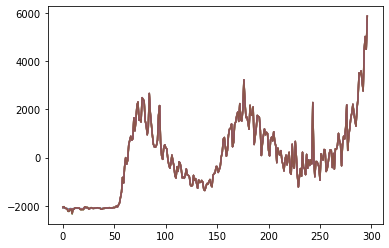

In [78]:
plt.plot(ss_rec1)

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


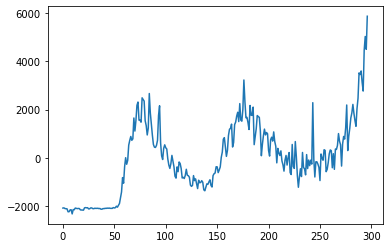

In [86]:
plt.plot(ss_rec2[:,5])

In [57]:
np.shape(((W_main.T@Y).T + np.mean(ss_mr, 0).T).T)

(297, 6)

In [48]:
np.shape(np.mean(ss_mr,0))

(297,)

## Idea 2: stack weekly

###### MA

In [95]:
MA_weekly = np.zeros((42,7))

In [108]:
for i in range(42):
    MA_weekly[i] = MA[i*7:i*7+7]
MA_mu = np.mean(MA_weekly, 0)
MA_w_mr = MA_weekly - MA_mu

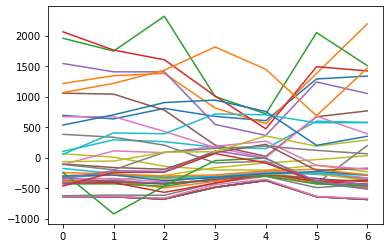

In [113]:
plt.plot(MA_w_mr.T)
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


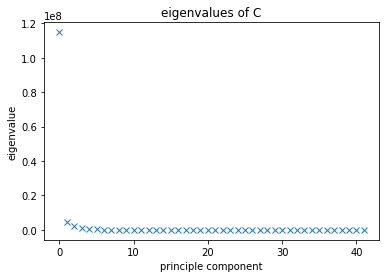

In [116]:
C = MA_w_mr@MA_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


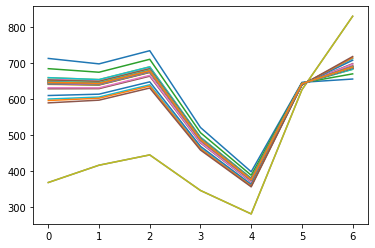

In [138]:
W_main = U[0:1,:]
Y = W_main@MA_w_mr
MA_w_rec = (W_main.T@(Y)) + MA_mu
plt.plot(MA_w_rec.T)
plt.show()

weird week is march 11!!!

###### IL

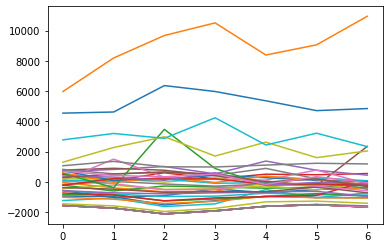

In [140]:
IL_weekly = np.zeros((42,7))
for i in range(42):
    IL_weekly[i] = IL[i*7:i*7+7]
IL_mu = np.mean(IL_weekly, 0)
IL_w_mr = IL_weekly - IL_mu
plt.plot(IL_w_mr.T)
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


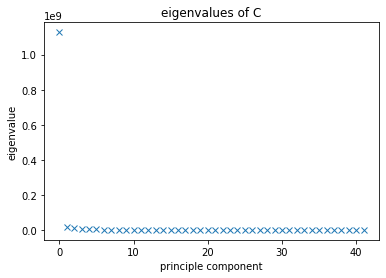

In [141]:
C = IL_w_mr@IL_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


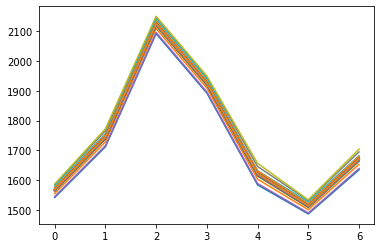

In [142]:
W_main = U[0:1,:]
Y = W_main@IL_w_mr
IL_w_rec = (W_main.T@(Y)) + IL_mu
plt.plot(IL_w_rec.T)
plt.show()

###### CA

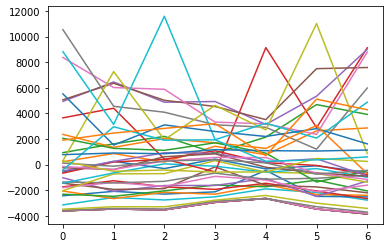

In [207]:
CA_weekly = np.zeros((42,7))
for i in range(42):
    CA_weekly[i] = CA[i*7:i*7+7]
CA_mu = np.mean(CA_weekly, 0)
CA_w_mr = CA_weekly - CA_mu
plt.plot(CA_w_mr.T)
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


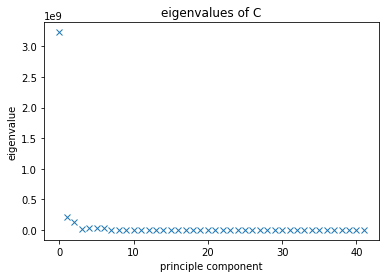

In [144]:
C = CA_w_mr@CA_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


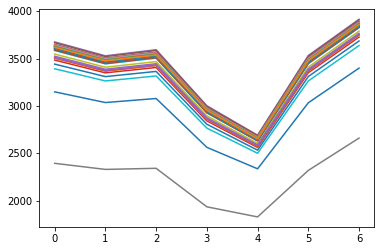

In [208]:
W_main = U[0:1,:]
Y = W_main@CA_w_mr
CA_w_rec = (W_main.T@(Y)) + CA_mu
plt.plot(CA_w_rec.T)
plt.show()

###### NY

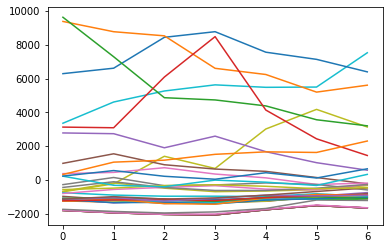

In [209]:
NY_weekly = np.zeros((42,7))
for i in range(42):
    NY_weekly[i] = NY[i*7:i*7+7]
NY_mu = np.mean(NY_weekly, 0)
NY_w_mr = NY_weekly - NY_mu
plt.plot(NY_w_mr.T)
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


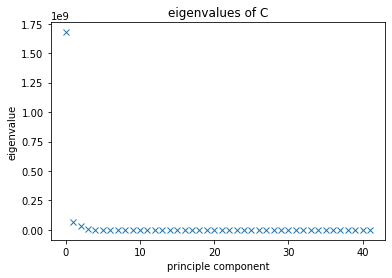

In [147]:
C = NY_w_mr@NY_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


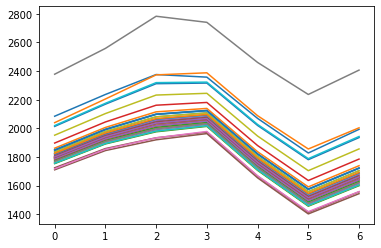

In [149]:
W_main = U[0:1,:]
Y = W_main@NY_w_mr
NY_w_rec = (W_main.T@(Y)) + NY_mu
plt.plot(NY_w_rec.T)
plt.show()

###### FL

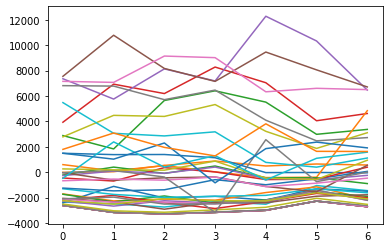

In [152]:
FL_weekly = np.zeros((42,7))
for i in range(42):
    FL_weekly[i] = FL[i*7:i*7+7]
FL_mu = np.mean(FL_weekly, 0)
FL_w_mr = FL_weekly - FL_mu
plt.plot(FL_w_mr.T)
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


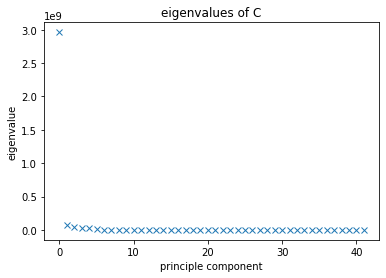

In [153]:
C = FL_w_mr@FL_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


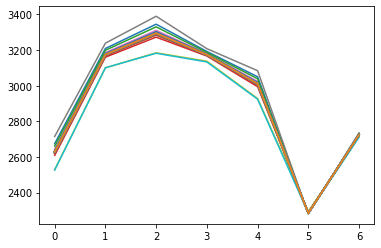

In [154]:
W_main = U[0:1,:]
Y = W_main@FL_w_mr
FL_w_rec = (W_main.T@(Y)) + FL_mu
plt.plot(FL_w_rec.T)
plt.show()

###### TX

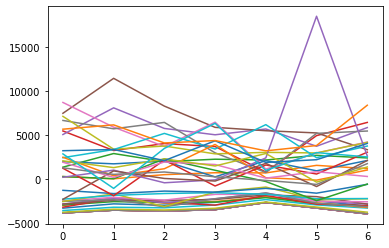

In [155]:
TX_weekly = np.zeros((42,7))
for i in range(42):
    TX_weekly[i] = TX[i*7:i*7+7]
TX_mu = np.mean(TX_weekly, 0)
TX_w_mr = TX_weekly - TX_mu
plt.plot(TX_w_mr.T)
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


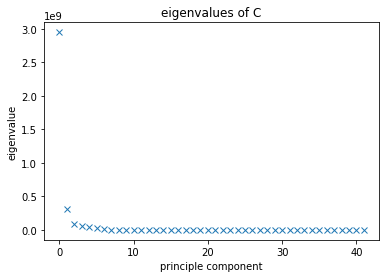

In [156]:
C = TX_w_mr@TX_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

/Users/Jacksun/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


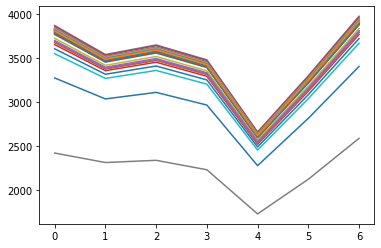

In [157]:
W_main = U[0:1,:]
Y = W_main@TX_w_mr
TX_w_rec = (W_main.T@(Y)) + TX_mu
plt.plot(TX_w_rec.T)
plt.show()

#### Comparing

In [210]:
TX_m = np.mean(TX_w_rec, 0);FL_m = np.mean(FL_w_rec, 0); MA_m = np.mean(MA_w_rec, 0); NY_m = np.mean(NY_w_rec, 0); CA_m = np.mean(CA_w_rec, 0); IL_m = np.mean(IL_w_rec, 0)

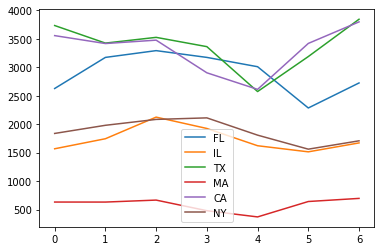

In [240]:
plt.plot(FL_m)
plt.plot(IL_m)
plt.plot(TX_m)
plt.plot(MA_m)
plt.plot(CA_m)
plt.plot(NY_m)
plt.legend(['FL', 'IL', 'TX', 'MA', 'CA', 'NY'])
plt.show()


# 50 State Comparison

In [199]:
def PCA_weekly_rec(state, states, nationwide):
    ind = np.where(states ==  state)
    current = US[ind][0]
    weekly = np.zeros((42,7))
    for i in range(42):
        weekly[i] = current[i*7:i*7+7]
    mu = np.mean(weekly, 0)
    weekly_mr = weekly - mu
    C = weekly_mr@weekly_mr.T
    D,U = np.linalg.eig(C)
    W_main = U[0:1,:]
    Y = W_main@weekly_mr
    weekly_rec = (W_main.T@(Y)) + mu
    weekly_rec_mu = np.mean(weekly_rec, 0)
    return weekly, weekly_mr, weekly_rec, weekly_rec_mu

In [222]:
states = np.array(["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"])
US = np.zeros((51, 297))
for i in range(len(states)):
    US[i] = get_state_arr(states[i], days)

In [223]:
AK_weekly, AK_weekly_mr, AK_weekly_rec, AK_weekly_rec_mu= PCA_weekly_rec(states[0],states, US)
AL_weekly, AL_weekly_mr, AL_weekly_rec, AL_weekly_rec_mu= PCA_weekly_rec(states[1],states, US)
AR_weekly, AR_weekly_mr, AR_weekly_rec, AR_weekly_rec_mu= PCA_weekly_rec(states[2],states, US)
AZ_weekly, AZ_weekly_mr, AZ_weekly_rec, AZ_weekly_rec_mu= PCA_weekly_rec(states[3],states, US)
CA_weekly, CA_weekly_mr, CA_weekly_rec, CA_weekly_rec_mu= PCA_weekly_rec(states[4],states, US)
CO_weekly, CO_weekly_mr, CO_weekly_rec, CO_weekly_rec_mu= PCA_weekly_rec(states[5],states, US)
CT_weekly, CT_weekly_mr, CT_weekly_rec, CT_weekly_rec_mu= PCA_weekly_rec(states[6],states, US)
DE_weekly, DE_weekly_mr, DE_weekly_rec, DE_weekly_rec_mu= PCA_weekly_rec(states[7],states, US)
FL_weekly, FL_weekly_mr, FL_weekly_rec, FL_weekly_rec_mu= PCA_weekly_rec(states[8],states, US)
GA_weekly, GA_weekly_mr, GA_weekly_rec, GA_weekly_rec_mu= PCA_weekly_rec(states[9],states, US)
HI_weekly, HI_weekly_mr, HI_weekly_rec, HI_weekly_rec_mu= PCA_weekly_rec(states[10],states, US)
IA_weekly, IA_weekly_mr, IA_weekly_rec, IA_weekly_rec_mu= PCA_weekly_rec(states[11],states, US)
ID_weekly, ID_weekly_mr, ID_weekly_rec, ID_weekly_rec_mu= PCA_weekly_rec(states[12],states, US)
IL_weekly, IL_weekly_mr, IL_weekly_rec, IL_weekly_rec_mu= PCA_weekly_rec(states[13],states, US)
IN_weekly, IN_weekly_mr, IN_weekly_rec, IN_weekly_rec_mu= PCA_weekly_rec(states[14],states, US)
KS_weekly, KS_weekly_mr, KS_weekly_rec, KS_weekly_rec_mu= PCA_weekly_rec(states[15],states, US)
KY_weekly, KY_weekly_mr, KY_weekly_rec, KY_weekly_rec_mu= PCA_weekly_rec(states[16],states, US)
LA_weekly, LA_weekly_mr, LA_weekly_rec, LA_weekly_rec_mu= PCA_weekly_rec(states[17],states, US)
MA_weekly, MA_weekly_mr, MA_weekly_rec, MA_weekly_rec_mu= PCA_weekly_rec(states[18],states, US)
MD_weekly, MD_weekly_mr, MD_weekly_rec, MD_weekly_rec_mu= PCA_weekly_rec(states[19],states, US)
ME_weekly, ME_weekly_mr, ME_weekly_rec, ME_weekly_rec_mu= PCA_weekly_rec(states[20],states, US)
MI_weekly, MI_weekly_mr, MI_weekly_rec, MI_weekly_rec_mu= PCA_weekly_rec(states[21],states, US)
MN_weekly, MN_weekly_mr, MN_weekly_rec, MN_weekly_rec_mu= PCA_weekly_rec(states[22],states, US)
MO_weekly, MO_weekly_mr, MO_weekly_rec, MO_weekly_rec_mu= PCA_weekly_rec(states[23],states, US)
MS_weekly, MS_weekly_mr, MS_weekly_rec, MS_weekly_rec_mu= PCA_weekly_rec(states[24],states, US)
MT_weekly, MT_weekly_mr, MT_weekly_rec, MT_weekly_rec_mu= PCA_weekly_rec(states[25],states, US)
NC_weekly, NC_weekly_mr, NC_weekly_rec, NC_weekly_rec_mu= PCA_weekly_rec(states[26],states, US)
ND_weekly, ND_weekly_mr, ND_weekly_rec, ND_weekly_rec_mu= PCA_weekly_rec(states[27],states, US)
NE_weekly, NE_weekly_mr, NE_weekly_rec, NE_weekly_rec_mu= PCA_weekly_rec(states[28],states, US)
NH_weekly, NH_weekly_mr, NH_weekly_rec, NH_weekly_rec_mu= PCA_weekly_rec(states[29],states, US)
NJ_weekly, NJ_weekly_mr, NJ_weekly_rec, NJ_weekly_rec_mu= PCA_weekly_rec(states[30],states, US)
NM_weekly, NM_weekly_mr, NM_weekly_rec, NM_weekly_rec_mu= PCA_weekly_rec(states[31],states, US)
NV_weekly, NV_weekly_mr, NV_weekly_rec, NV_weekly_rec_mu= PCA_weekly_rec(states[32],states, US)
NY_weekly, NY_weekly_mr, NY_weekly_rec, NY_weekly_rec_mu= PCA_weekly_rec(states[33],states, US)
OH_weekly, OH_weekly_mr, OH_weekly_rec, OH_weekly_rec_mu= PCA_weekly_rec(states[34],states, US)
OK_weekly, OK_weekly_mr, OK_weekly_rec, OK_weekly_rec_mu= PCA_weekly_rec(states[35],states, US)
OR_weekly, OR_weekly_mr, OR_weekly_rec, OR_weekly_rec_mu= PCA_weekly_rec(states[36],states, US)
PA_weekly, PA_weekly_mr, PA_weekly_rec, PA_weekly_rec_mu= PCA_weekly_rec(states[37],states, US)
PR_weekly, PR_weekly_mr, PR_weekly_rec, PR_weekly_rec_mu= PCA_weekly_rec(states[38],states, US)
RI_weekly, RI_weekly_mr, RI_weekly_rec, RI_weekly_rec_mu= PCA_weekly_rec(states[39],states, US)
SC_weekly, SC_weekly_mr, SC_weekly_rec, SC_weekly_rec_mu= PCA_weekly_rec(states[40],states, US)
SD_weekly, SD_weekly_mr, SD_weekly_rec, SD_weekly_rec_mu= PCA_weekly_rec(states[41],states, US)
TN_weekly, TN_weekly_mr, TN_weekly_rec, TN_weekly_rec_mu= PCA_weekly_rec(states[42],states, US)
TX_weekly, TX_weekly_mr, TX_weekly_rec, TX_weekly_rec_mu= PCA_weekly_rec(states[43],states, US)
UT_weekly, UT_weekly_mr, UT_weekly_rec, UT_weekly_rec_mu= PCA_weekly_rec(states[44],states, US)
VA_weekly, VA_weekly_mr, VA_weekly_rec, VA_weekly_rec_mu= PCA_weekly_rec(states[45],states, US)
VT_weekly, VT_weekly_mr, VT_weekly_rec, VT_weekly_rec_mu= PCA_weekly_rec(states[46],states, US)
WA_weekly, WA_weekly_mr, WA_weekly_rec, WA_weekly_rec_mu= PCA_weekly_rec(states[47],states, US)
WI_weekly, WI_weekly_mr, WI_weekly_rec, WI_weekly_rec_mu= PCA_weekly_rec(states[48],states, US)
WV_weekly, WV_weekly_mr, WV_weekly_rec, WV_weekly_rec_mu= PCA_weekly_rec(states[49],states, US)
WY_weekly, WY_weekly_mr, WY_weekly_rec, WY_weekly_rec_mu= PCA_weekly_rec(states[50],states, US)

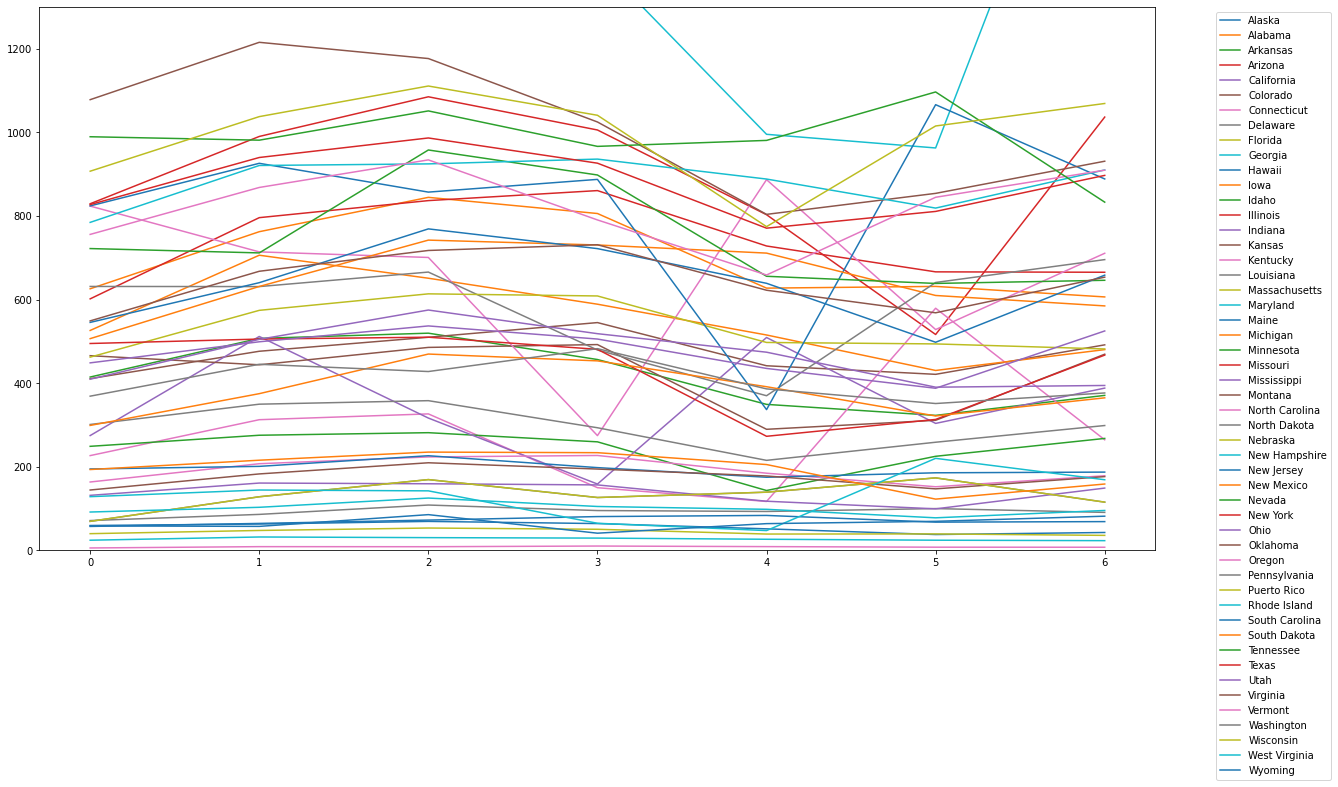

In [241]:
plt.figure(figsize=(20,10))
plt.plot(AK_weekly_rec_mu); plt.plot(AL_weekly_rec_mu); plt.plot(AR_weekly_rec_mu); plt.plot(AZ_weekly_rec_mu)
plt.plot(CA_weekly_rec_mu); 
plt.plot(CO_weekly_rec_mu); plt.plot(CT_weekly_rec_mu); plt.plot(DE_weekly_rec_mu); plt.plot(FL_weekly_rec_mu)
plt.plot(GA_weekly_rec_mu); 
plt.plot(HI_weekly_rec_mu); plt.plot(IA_weekly_rec_mu); plt.plot(ID_weekly_rec_mu)
plt.plot(IN_weekly_rec_mu); plt.plot(KS_weekly_rec_mu); plt.plot(KY_weekly_rec_mu); plt.plot(LA_weekly_rec_mu)
plt.plot(MA_weekly_rec_mu); 
plt.plot(MD_weekly_rec_mu); plt.plot(ME_weekly_rec_mu); plt.plot(MI_weekly_rec_mu)
plt.plot(MN_weekly_rec_mu); plt.plot(MO_weekly_rec_mu); plt.plot(MS_weekly_rec_mu); plt.plot(MT_weekly_rec_mu)
plt.plot(NC_weekly_rec_mu); plt.plot(ND_weekly_rec_mu); plt.plot(NE_weekly_rec_mu); plt.plot(NH_weekly_rec_mu)
plt.plot(NJ_weekly_rec_mu); plt.plot(NM_weekly_rec_mu); plt.plot(NV_weekly_rec_mu); plt.plot(NY_weekly_rec_mu)
plt.plot(OH_weekly_rec_mu); plt.plot(OK_weekly_rec_mu); plt.plot(OR_weekly_rec_mu); plt.plot(PA_weekly_rec_mu)
plt.plot(PR_weekly_rec_mu); plt.plot(PR_weekly_rec_mu); plt.plot(RI_weekly_rec_mu); plt.plot(SC_weekly_rec_mu)
plt.plot(SD_weekly_rec_mu); plt.plot(TN_weekly_rec_mu); plt.plot(TX_weekly_rec_mu); plt.plot(UT_weekly_rec_mu)
plt.plot(VA_weekly_rec_mu); plt.plot(VT_weekly_rec_mu); plt.plot(WA_weekly_rec_mu); plt.plot(WI_weekly_rec_mu)
plt.plot(WV_weekly_rec_mu); plt.plot(WY_weekly_rec_mu)
plt.legend(states, bbox_to_anchor=(1.05, 1))
plt.ylim([0, 1300])
plt.show()